# **Construindo uma distribuição de frequência com base em um conjunto de dados**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis.
Construa uma distribuição de frequência com sete classes.

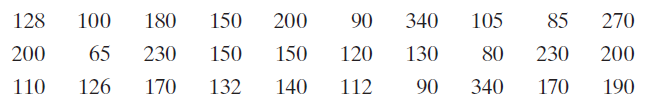

In [37]:
import pandas as pd
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270, 
                  200, 65, 230, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
print(data)
v_max = data.max()
v_min = data.min()
classe = 7

0     128
1     100
2     180
3     150
4     200
5      90
6     340
7     105
8      85
9     270
10    200
11     65
12    230
13    150
14    120
15    130
16     80
17    230
18    200
19    110
20    126
21    170
22    132
23    140
24    112
25     90
26    340
27    170
28    190
dtype: int64


# **Distribuição de Frequências**

O método value_counts registra a frequência de ocorrência dos dados em cada classe (o número de classes é dado pelo parâmetro bins). O método sort_index ordena os índices (classes) em ordem crescente.

In [36]:
dist_freq = data.value_counts(bins=classe).sort_index()
print (dist_freq)


(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              5
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
dtype: int64


Note que as classes da distribuição de frequências não estão definidas de forma "amigável". Vamos alterar a definição dos intervalos de classe usando o método interval_range.

In [55]:
from math import ceil
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = dist_freq.reset_index()
dist_freq.columns = ['classe', 'Frequência']
amplitude = ceil((v_max - v_min) / classe)
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)
nova_dist_freq['Pontos médios'] = intervalos
print(intervalos)
nova_dist_freq

IntervalIndex([(65, 105], (105, 145], (145, 185], (185, 225], (225, 265], (265, 305], (305, 345]], dtype='interval[int64, right]')


,index,0,Pontos médios
0,"(64.72399999999999, 104.286]",6,"(65, 105]"
1,"(104.286, 143.571]",9,"(105, 145]"
2,"(143.571, 182.857]",5,"(145, 185]"
3,"(182.857, 222.143]",4,"(185, 225]"
4,"(222.143, 261.429]",2,"(225, 265]"
5,"(261.429, 300.714]",1,"(265, 305]"
6,"(300.714, 340.0]",2,"(305, 345]"


# **Caracterísiticas adicionais da distribuição**

Vamos adicionar as colunas que exibam os pontos médios, a frequência relativa e a frequência acumnulada de cada classe.

In [56]:
pts_medio = [inter.mid for inter in intervalos]
nova_dist_freq['Pontos médios'] = pts_medio
observacoes = len(data)
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()
display(nova_dist_freq)

KeyError: ignored

# **Construção do histograma de frequências**

O histograma é construído usando o método hist do Pandas. Diversas características do histograma, tais como as classes (parâmetro bins), cor das barras e marcações nos eixos vertical e horizontal são programáveis. Também é inserida a frequência observada no topo de cada barra.

In [48]:
histograma = data.hist(bins=[inter.left for inter in intervalos]+
                       [nova_dist_freq['classe'][classe-1].right]],
                       color = 'blue' , edgecolor = 'black', grid=False)
histograma.set (xlabel = 'Preço [US$]',
                ylabel = 'Frequência \n Número de navegadores de GPS',
                title = 'Distribuição de frequência de preços de GPS',
                xticks = nova_dist_freq ['Pontos Médios']
                yticks = range(0, nova_dist_freq['Frequência'].max()+2))
# Opcional - Inserção das Frequências nas barras.
barras = histograma.patches
freqs = nova_dist_freq['Frequência']
for barra, freq in zip(barras, freqs):
  altura = barra.get_height()
  histograma.text(barra.get_x()+barra.get_width()/2, altura,
                  freq, ha='center', va='bottom')

SyntaxError: ignored

# **Construção do polígono de frequências**

Para construir o polígono de frequências, vamos empregar a biblioteca matplotlib.

In [50]:
import matplotlib.pyplot as plt
fic_esq = [pts_medios [0]-amplitude]
fic_dir = [pts_medios [-1]+amplitude]
x_data = fic_esq + pts_medios + fic_dir
y_data = [0] + list(nova_dist_freq['Frequência']) + 0
plt.plot(x_data, y_data, 'go--')



KeyError: ignored